In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
df_train = pd.read_csv('C:/Python/Kaggle/working/train_new.csv')
df_test = pd.read_csv('C:/Python/Kaggle/working/test_new.csv')

In [118]:
import pandas as pd

# Assuming df_train is your DataFrame containing expense columns
expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create the 'total_expenses' variable by summing the values of the expense columns
df_train['total_expenses'] = df_train[expense_columns].sum(axis=1)
# Create the 'total_expenses' variable by summing the values of the expense columns
df_test['total_expenses'] = df_test[expense_columns].sum(axis=1)

def categorize_activity(row):
    if row['CryoSleep'] == 'FALSE':
        if all(row[col] > 0 for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
            return 'Very Active'
        elif any(row[col] > 0 for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
            return 'Mod Active'
        elif all(row[col] == 0 for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
            return 'Not Active'
        else:
            return 'None'
    else:
        return 'None'

# Apply the categorize_activity function to create the 'active' variable for df_train
df_train['active'] = df_train.apply(categorize_activity, axis=1)

# Apply the categorize_activity function to create the 'active' variable for df_test
df_test['active'] = df_test.apply(categorize_activity, axis=1)

# Define a function to determine if age is an embryo
def is_embryo(age):
    if age == 0:
        return True
    else:
        return False

# Apply the function to create the 'Embryo' variable for df_train
df_train['Embryo'] = df_train['Age'].apply(is_embryo)

# Apply the function to create the 'Embryo' variable for df_test
df_test['Embryo'] = df_test['Age'].apply(is_embryo)




In [119]:
# Importing pandas library
import pandas as pd

# Assuming df_test and df_train are your dataframes

# Display number of rows and columns of df_test
print("Number of rows in df_test:", df_test.shape[0])
print("Number of columns in df_test:", df_test.shape[1])

# Display number of rows and columns of df_train
print("Number of rows in df_train:", df_train.shape[0])
print("Number of columns in df_train:", df_train.shape[1])



Number of rows in df_test: 4277
Number of columns in df_test: 20
Number of rows in df_train: 8693
Number of columns in df_train: 21


In [120]:
df_train.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Transported,Grouped,Deck,Side,Has_expenses,Is_Embryo,active,total_expenses,Group_nums
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,...,0.0,False,False,B,P,False,False,Not Active,0.0,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,...,44.0,True,False,F,S,True,False,Very Active,736.0,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,...,49.0,False,True,A,S,True,False,Mod Active,10383.0,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,...,193.0,False,True,A,S,True,False,Mod Active,5176.0,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,...,2.0,True,False,F,S,True,False,Very Active,1091.0,0004


In [121]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_nums,Grouped,Deck,Side,Has_expenses,Is_Embryo,active,total_expenses
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0.0,0.0,0.0,0.0,0.0,0013,False,G,S,False,False,NaN,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0.0,9.0,0.0,2823.0,0.0,0018,False,F,S,True,False,Mod Active,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0.0,0.0,0.0,0.0,0.0,0019,False,C,S,False,False,NaN,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0.0,6652.0,0.0,181.0,585.0,0021,False,C,S,True,False,Mod Active,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10.0,0.0,635.0,0.0,0.0,0023,False,F,S,True,False,Mod Active,645.0


In [123]:
df_train.columns
df_train.dtypes

features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP','total_expenses', 'active' ,'RoomService','FoodCourt','ShoppingMall'	,'Spa',
            'VRDeck','Grouped', 'Deck', 'Has_expenses', 'Side', 'Is_Embryo']

X = pd.get_dummies(df_train[features])
y = df_train['Transported']

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [125]:
#logistic
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
model.score(X_test,y_test)  # 80


# Calculate and display the score on the training data
log_Train_score = model.score(X_test,y_test) 
print("Training score:", log_Train_score)

Training score: 0.8040478380864765


In [127]:
y_pred_log = model.predict(pd.get_dummies(df_test[features]))
y_pred_log2 = model2.predict(pd.get_dummies(df_test[features]))

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [158]:

#KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(2,15)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X,y)
knn2 = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn2.fit(X,y)
knn2.score(X,y) 

# Calculate and display the score on the training data
knn_train_score = knn2.score(X,y)
print("Training score:", knn_train_score)

y_pred_knn = knn2.predict(pd.get_dummies(df_test[features]))



Training score: 0.8161739330495801


In [137]:

#Random Forest

fr = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
fr.fit(X,y)
fr.score(X,y)

y_pred_rf = fr.predict(pd.get_dummies(df_test[features]))

out_test = pd.get_dummies(df_test[features])

# Calculate and display the score on the training data
RF_train_score = fr.score(X,y)
print("Training score:", RF_train_score)

Training score: 0.7603819164845278


In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state = 1)

In [133]:

#XGB

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

# Calculate and display the score on the training data
XGB_train_score = xgb.score(X_test,y_test)
print("Training score:", XGB_train_score)

y_pred_xgb = xgb.predict(pd.get_dummies((df_test[features])))

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1]
}

Training score: 0.8022079116835327


In [135]:
#GB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

cv = RandomizedSearchCV(gbc, parameters, n_iter=27, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)
cv.fit(X,y)
cv.best_params_

gbc1 = GradientBoostingClassifier(n_estimators=50,max_depth=5,learning_rate=0.1)

gbc1.fit(X,y)
gbc1.score(X,y)

# Calculate and display the score on the training data
GB_train_score = gbc1.score(X,y)
print("Training score:", GB_train_score)


pred_y_gbr2 = gbc1.predict(pd.get_dummies((df_test[features])))

Training score: 0.8322788450477395


In [162]:

#Metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features and target variable
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'total_expenses', 'active', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Grouped', 'Deck', 'Has_expenses', 'Side', 'Is_Embryo']
X = pd.get_dummies(df_train[features])
y = df_train['Transported']

# Split the data into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Create classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=1),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create an empty DataFrame to store performance metrics and confusion matrices
metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
confusion_matrices = {}

# Iterate over classifiers
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    
    # Append metrics to DataFrame
    metrics_df.loc[name] = [accuracy, precision, recall, f1, roc_auc]

# Display the performance metrics table
print("Performance Metrics:")
print(metrics_df)

# Display confusion matrices
print("\nConfusion Matrices:")
for name, cm in confusion_matrices.items():
    print("\n", name, ":\n", cm)


Performance Metrics:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        0.796228   0.826382  0.763441  0.793666  0.797127
Logistic Regression  0.804048   0.796902  0.829749  0.812994  0.803343
XGBoost              0.802208   0.798261  0.822581  0.810238  0.801649
Gradient Boosting    0.812328   0.797479  0.850358  0.823070  0.811285
K-Nearest Neighbors  0.788408   0.792857  0.795699  0.794275  0.788209

Confusion Matrices:

 Random Forest :
 [[879 179]
 [264 852]]

 Logistic Regression :
 [[822 236]
 [190 926]]

 XGBoost :
 [[826 232]
 [198 918]]

 Gradient Boosting :
 [[817 241]
 [167 949]]

 K-Nearest Neighbors :
 [[826 232]
 [228 888]]


In [163]:
from IPython.display import display, HTML

# Define the table label
table_label = "Table 1: Performance Metrics"

# Create HTML table with label
html_table = f"<h4>{table_label}</h4>"
html_table += metrics_df.to_html()

# Display the HTML table
display(HTML(html_table))


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.796228,0.826382,0.763441,0.793666,0.797127
Logistic Regression,0.804048,0.796902,0.829749,0.812994,0.803343
XGBoost,0.802208,0.798261,0.822581,0.810238,0.801649
Gradient Boosting,0.812328,0.797479,0.850358,0.823070,0.811285
K-Nearest Neighbors,0.788408,0.792857,0.795699,0.794275,0.788209


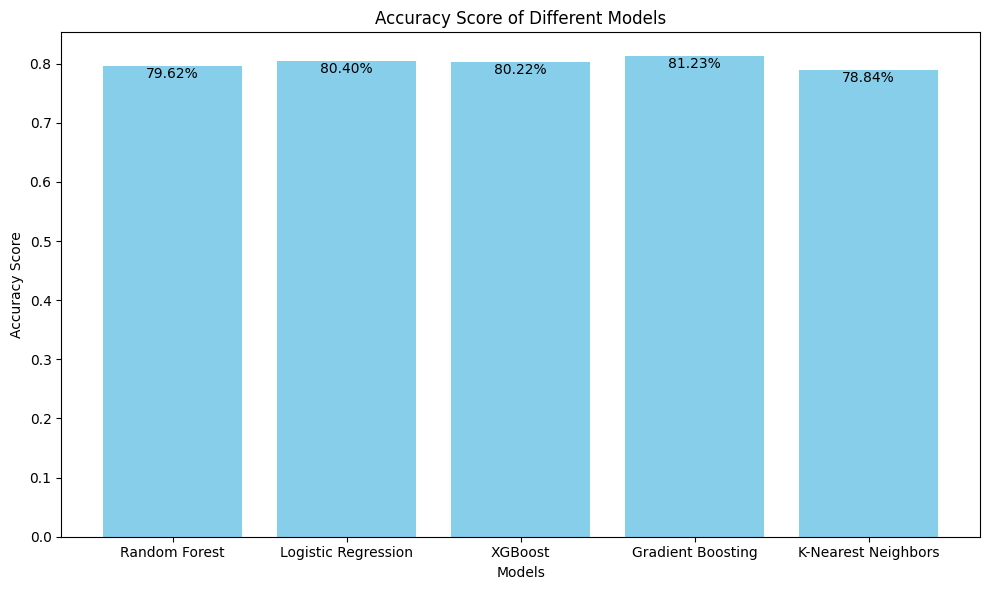

In [171]:
import matplotlib.pyplot as plt

# Extract accuracy scores from the metrics DataFrame
accuracy_scores = metrics_df['Accuracy']

# Create a figure with a single subplot
plt.figure(figsize=(10, 6))

# Plot accuracy scores
bars = plt.bar(metrics_df.index, accuracy_scores, color='skyblue')

# Add percentages on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.02, 
             f"{bar.get_height()*100:.2f}%", 
             ha='center', 
             color='black', 
             fontsize=10)

# Adjust labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Models')

plt.tight_layout()
plt.show()


In [145]:
#export Prediction File

Logist_out = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Transported': y_pred_log})
Logist_out.to_csv('logist_prediction.csv',index=False)

knn_out = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Transported': y_pred_knn})
knn_out.to_csv('knn_prediction.csv',index=False)

rf_out = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Transported': y_pred_rf})
rf_out.to_csv('rf_prediction.csv',index=False)

gbc_out = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Transported':pred_y_gbr2})
gbc_out.to_csv('gbr_prediction.csv',index=False)

xgb_out = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Transported':y_pred_xgb.astype('bool')})
xgb_out.to_csv('xgb_prediction.csv',index=False)
